In [1]:
import pandas as pd
import numpy as np
import warnings
from pathlib import Path

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore')

DIR = Path('./data/')

# Dataloading

In [81]:
train = pd.read_csv(DIR / 'train.csv')
test = pd.read_csv(DIR / 'test.csv')
stores = pd.read_csv(DIR / 'stores.csv')
oil = pd.read_csv(DIR / 'oil.csv')
transactions =  pd.read_csv(DIR / 'transactions.csv').sort_values(["store_nbr", "date"])
holidays_events = pd.read_csv(DIR / 'holidays_events.csv')

# Datetime
train["date"] = pd.to_datetime(train.date)
test["date"] = pd.to_datetime(test.date)
transactions["date"] = pd.to_datetime(transactions.date)
oil["date"] = pd.to_datetime(oil.date)

# Data types
train.onpromotion = train.onpromotion.astype("float16")
train.sales = train.sales.astype("float32")
stores.cluster = stores.cluster.astype("int8")

# EDA

## Transactions

In [29]:
fig =px.line(transactions.sort_values(["store_nbr", "date"]), x='date', y='transactions', color='store_nbr',title = "Transactions" )
fig.write_image("./figs/transactions_timeline_by_store.png") 

In [73]:
def get_color_palette(col):
    n = col.unique()
    pal = dict(zip(n, sns.color_palette("Set1", n_colors=len(n))))
    return pal 

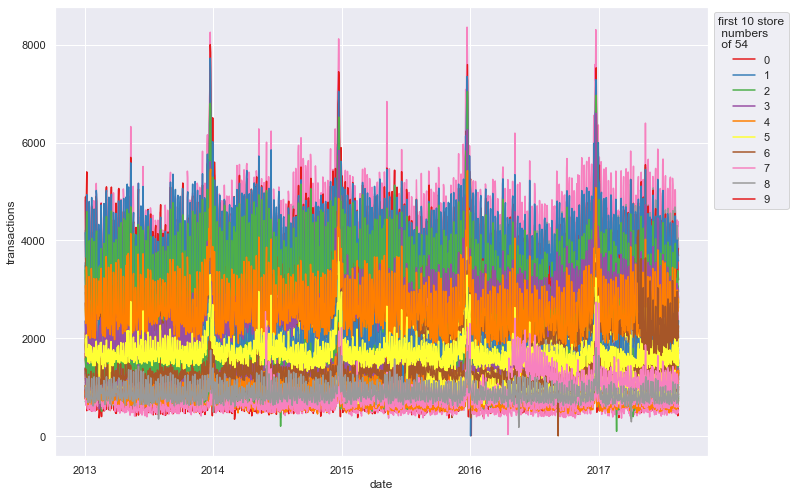

In [74]:
pal = get_color_palette(transactions['store_nbr'])
fig =sns.lineplot(data=transactions.sort_values(["store_nbr", "date"]), x="date", y="transactions", hue="store_nbr", palette=pal)
h,l = fig.get_legend_handles_labels()
fig.legend(h[0:10],[i for i in range(0,10)],title="first 10 store\n numbers\n of 54", loc="upper right") 
sns.move_legend(fig, "upper left", bbox_to_anchor=(1, 1))
fig
plt.savefig("./figs/transactions_timeline_by_store.png",bbox_inches="tight")

In [5]:
a = transactions.copy()
a["year"] = a.date.dt.year
a["month"] = a.date.dt.month
px.box(a, x="year", y="transactions" , color = "month", title = "Transactions")


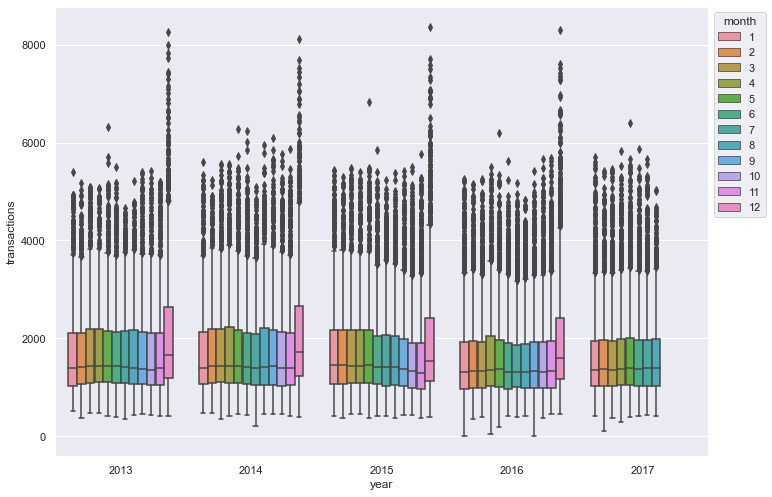

In [28]:
a = transactions.copy()
a["year"] = a.date.dt.year
a["month"] = a.date.dt.month
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.boxplot(data=a, x="year", y="transactions" , hue = "month")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Saving the Seaborn Figure:
plt.savefig('figs/transactions_boxplot.png')

There is a stable pattern in Transaction. All months are similar except December from 2013 to 2017 by boxplot. In addition, we've just seen same pattern for each store in previous plot. Store sales had always increased at the end of the year.

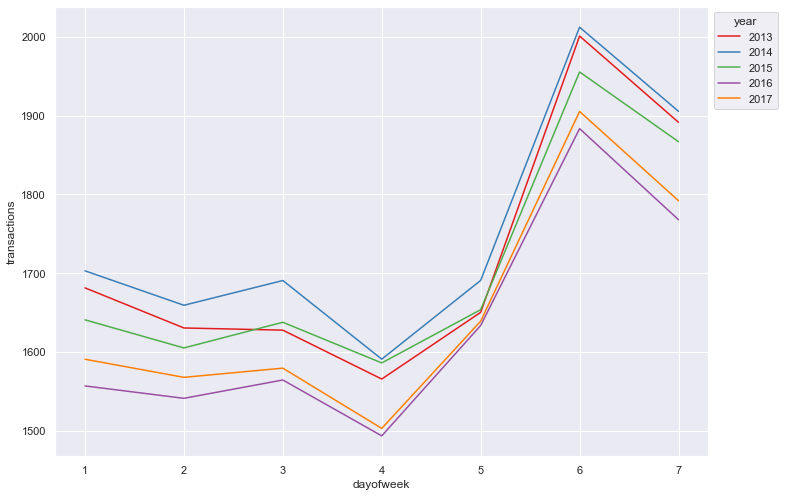

In [75]:
a = transactions.copy()
a["year"] = a.date.dt.year
a["dayofweek"] = a.date.dt.dayofweek+1
sns.set(rc={'figure.figsize':(11.7,8.27)})

a = a.groupby(["year", "dayofweek"]).transactions.mean().reset_index()
ax = sns.lineplot(data=a, x="dayofweek", y="transactions" , hue = "year", palette=get_color_palette(a["year"]))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Saving the Seaborn Figure:
plt.savefig('figs/transactions_dayofweek.png')

In [64]:
a = transactions.copy()
a["year"] = a.date.dt.year
a["dayofweek"] = a.date.dt.dayofweek+1
a = a.groupby(["year", "dayofweek"]).transactions.mean().reset_index()
px.line(a, x="dayofweek", y="transactions" , color = "year", title = "Transactions")

## Oil

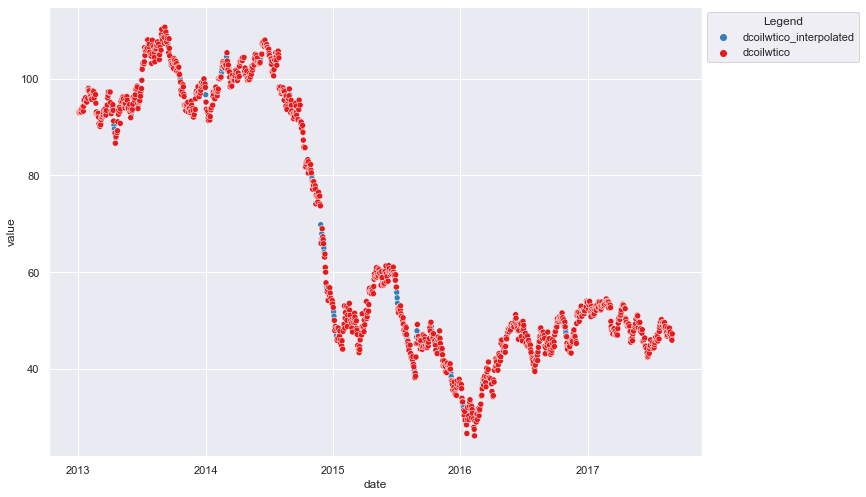

In [92]:
# Resample
oil = oil.set_index("date").dcoilwtico.resample("D").sum().reset_index()
# Interpolate
oil["dcoilwtico"] = np.where(oil["dcoilwtico"] == 0, np.nan, oil["dcoilwtico"])
oil["dcoilwtico_interpolated"] =oil.dcoilwtico.interpolate()
# Plot
p = oil.melt(id_vars=['date']+list(oil.keys()[5:]), var_name='Legend')
ax = sns.scatterplot(data = p.sort_values(["Legend", "date"], ascending = [False, True]), x="date", y="value", hue="Legend", palette=get_color_palette(p["Legend"] ))
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# Saving the Seaborn Figure:
plt.savefig('figs/oil_missing_data.png')

In [78]:
# Resample
oil = oil.set_index("date").dcoilwtico.resample("D").sum().reset_index()
# Interpolate
oil["dcoilwtico"] = np.where(oil["dcoilwtico"] == 0, np.nan, oil["dcoilwtico"])
oil["dcoilwtico_interpolated"] =oil.dcoilwtico.interpolate()
# Plot
p = oil.melt(id_vars=['date']+list(oil.keys()[5:]), var_name='Legend')
px.line(p.sort_values(["Legend", "date"], ascending = [False, True]), x='date', y='value', color='Legend',title = "Daily Oil Price" )

## Sales

In [109]:


a = train[["store_nbr", "sales"]]
a["ind"] = 1
a["ind"] = a.groupby("store_nbr").ind.cumsum().values
pd.set_option("display.max_rows", None, "display.max_columns", None)
#a.iloc[20:1100,:]
train.iloc[20:1100,:]
#a = pd.pivot(a, index = "ind", columns = "store_nbr", values = "sales").corr()

id       date  store_nbr                      family  sales  \
20      20 2013-01-01          1             LAWN AND GARDEN   0.00   
21      21 2013-01-01          1                    LINGERIE   0.00   
22      22 2013-01-01          1            LIQUOR,WINE,BEER   0.00   
23      23 2013-01-01          1                   MAGAZINES   0.00   
24      24 2013-01-01          1                       MEATS   0.00   
25      25 2013-01-01          1               PERSONAL CARE   0.00   
26      26 2013-01-01          1                PET SUPPLIES   0.00   
27      27 2013-01-01          1     PLAYERS AND ELECTRONICS   0.00   
28      28 2013-01-01          1                     POULTRY   0.00   
29      29 2013-01-01          1              PREPARED FOODS   0.00   
30      30 2013-01-01          1                     PRODUCE   0.00   
31      31 2013-01-01          1  SCHOOL AND OFFICE SUPPLIES   0.00   
32      32 2013-01-01          1                     SEAFOOD   0.00   
33      33 2013-01-01         10                  AUTOMOTIVE   0.00   
34      34 2013-01-01         10                   BABY CARE   0.00   
35      35 2013-01-01         10                      BEAUTY   0.00   
36      36 2013-01-01         10                   BEVERAGES   0.00   
37      37 2013-01-01         10                       BOOKS   0.00   
38      38 2013-01-01         10                BREAD/BAKERY   0.00   
39      39 2013-01-01         10                 CELEBRATION   0.00   
40      40 2013-01-01         10                    CLEANING   0.00   
41      41 2013-01-01         10                       DAIRY   0.00   
42      42 2013-01-01         10                        DELI   0.00   
43      43 2013-01-01         10                        EGGS   0.00   
44      44 2013-01-01         10                FROZEN FOODS   0.00   
45      45 2013-01-01         10                   GROCERY I   0.00   
46      46 2013-01-01         10                  GROCERY II   0.00   
47      47 2013-01-01         10                    HARDWARE   0.00   
48      48 2013-01-01         10          HOME AND KITCHEN I   0.00   
49      49 2013-01-01         10         HOME AND KITCHEN II   0.00   
50      50 2013-01-01         10             HOME APPLIANCES   0.00   
51      51 2013-01-01         10                   HOME CARE   0.00   
52      52 2013-01-01         10                  LADIESWEAR   0.00   
53      53 2013-01-01         10             LAWN AND GARDEN   0.00   
54      54 2013-01-01         10                    LINGERIE   0.00   
55      55 2013-01-01         10            LIQUOR,WINE,BEER   0.00   
56      56 2013-01-01         10                   MAGAZINES   0.00   
57      57 2013-01-01         10                       MEATS   0.00   
58      58 2013-01-01         10               PERSONAL CARE   0.00   
59      59 2013-01-01         10                PET SUPPLIES   0.00   
60      60 2013-01-01         10     PLAYERS AND ELECTRONICS   0.00   
61      61 2013-01-01         10                     POULTRY   0.00   
62      62 2013-01-01         10              PREPARED FOODS   0.00   
63      63 2013-01-01         10                     PRODUCE   0.00   
64      64 2013-01-01         10  SCHOOL AND OFFICE SUPPLIES   0.00   
65      65 2013-01-01         10                     SEAFOOD   0.00   
66      66 2013-01-01         11                  AUTOMOTIVE   0.00   
67      67 2013-01-01         11                   BABY CARE   0.00   
68      68 2013-01-01         11                      BEAUTY   0.00   
69      69 2013-01-01         11                   BEVERAGES   0.00   
70      70 2013-01-01         11                       BOOKS   0.00   
71      71 2013-01-01         11                BREAD/BAKERY   0.00   
72      72 2013-01-01         11                 CELEBRATION   0.00   
73      73 2013-01-01         11                    CLEANING   0.00   
74      74 2013-01-01         11                       DAIRY   0.00   
75      75 2013-01-01         11

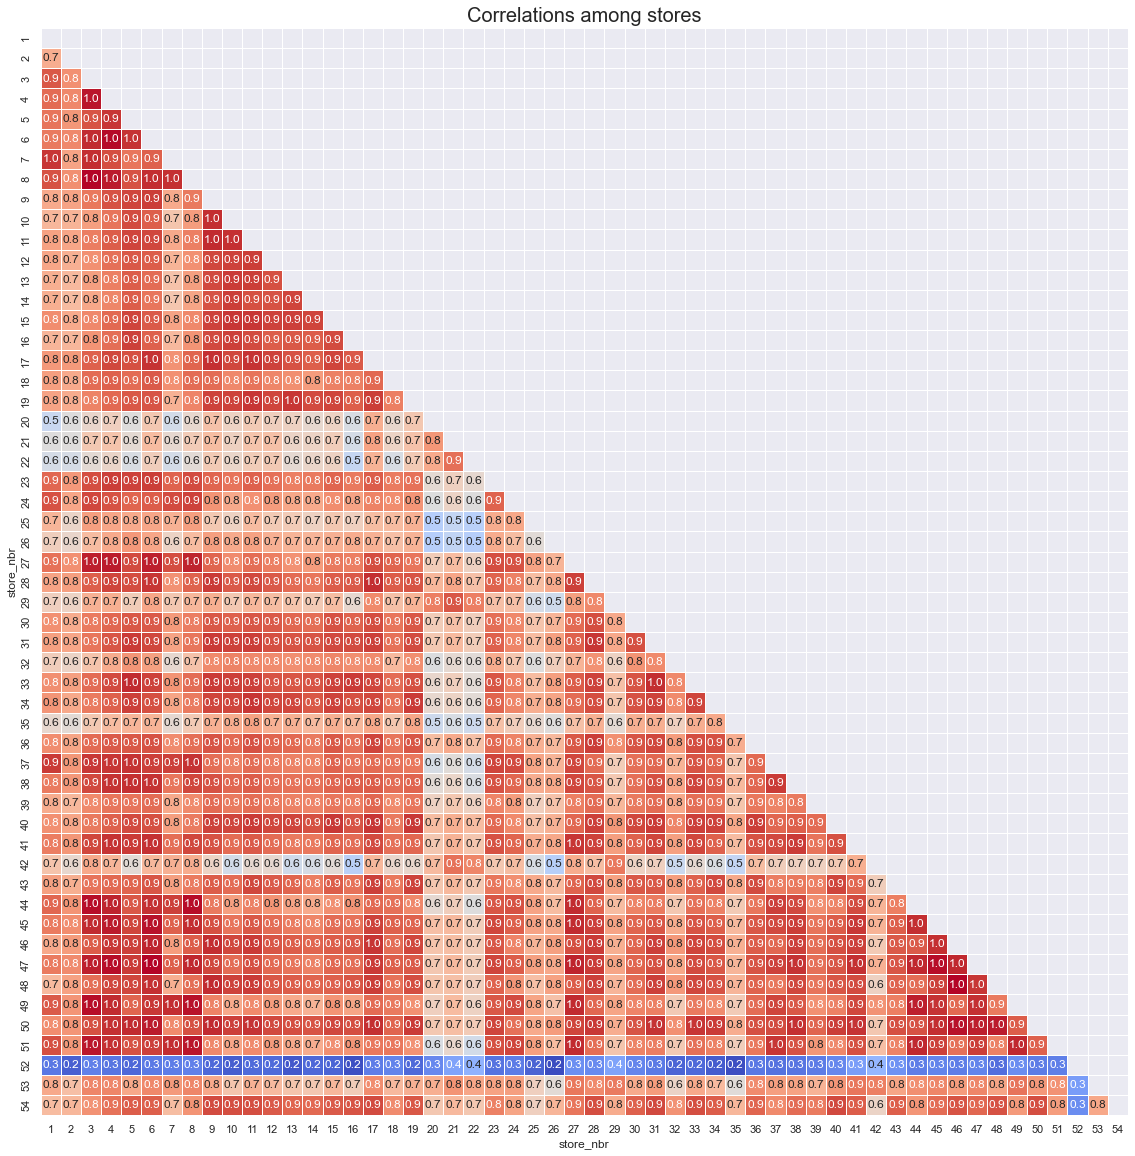

<Figure size 842.4x595.44 with 0 Axes>

In [95]:
a = train[["store_nbr", "sales"]]
a["ind"] = 1
a["ind"] = a.groupby("store_nbr").ind.cumsum().values
a = pd.pivot(a, index = "ind", columns = "store_nbr", values = "sales").corr()
mask = np.triu(a.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(a,
        annot=True,
        fmt='.1f',
        cmap='coolwarm',
        square=True,
        mask=mask,
        linewidths=1,
        cbar=False)
plt.title("Correlations among stores",fontsize = 20)
plt.show()
plt.savefig('figs/correlations_among_stores.png')